In [38]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])



In [39]:
eeg = pd.read_parquet('./eeg1.parquet')
eeg.head()

orig_cols = eeg.columns

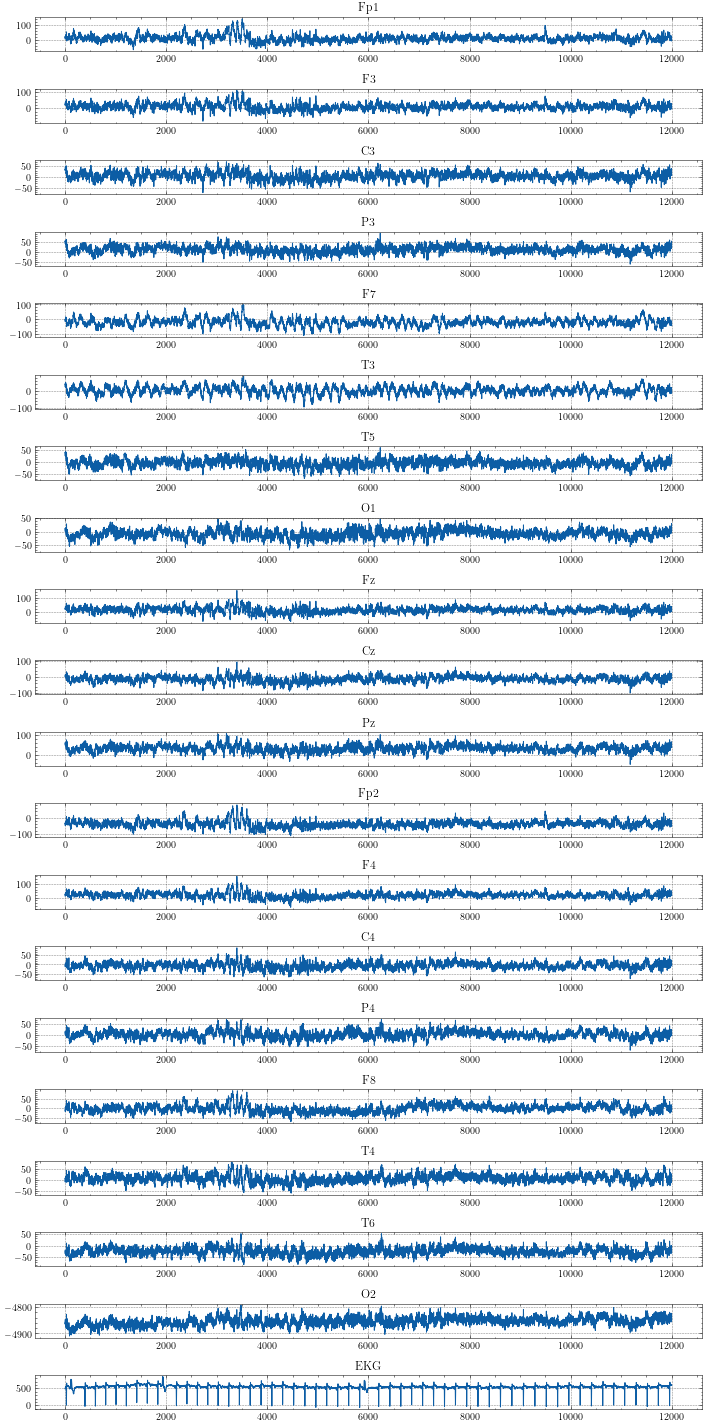

In [40]:
# plot all eeg cols in a single column and len(eeg.columns) rows
fig, axes = plt.subplots(len(eeg.columns), 1, figsize=(10, 20))
for i, col in enumerate(eeg.columns):
    axes[i].plot(eeg[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


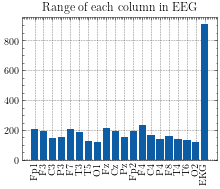

In [41]:
# make a bar plot the range of each column in diff_cols
ranges = [eeg[col].max() - eeg[col].min() for col in orig_cols]
plt.bar(orig_cols, ranges)
plt.xticks(rotation=90)
plt.title('Range of each column in EEG')
plt.show()

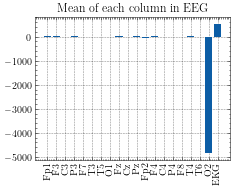

In [42]:
# make a bar plot of the mean of each column in diff_cols
means = [eeg[col].mean() for col in orig_cols]
plt.bar(orig_cols, means)
plt.xticks(rotation=90)
plt.title('Mean of each column in EEG')
plt.show()


* O2 is way off from others...normalize means before differentials?

# Look at differentials

In [43]:
eeg['Fp1-F7'] = eeg.Fp1 - eeg.F7
eeg['F7-T3'] = eeg.F7 - eeg.T3
eeg['T3-T5'] = eeg.T3 - eeg.T5
eeg['T5-O1'] = eeg.T5 - eeg.O1

eeg['Fp1-F3'] = eeg.Fp1 - eeg.F3
eeg['F3-C3'] = eeg.F3 - eeg.C3
eeg['C3-P3'] = eeg.C3 - eeg.P3
eeg['P3-O1'] = eeg.P3 - eeg.O1

eeg['Fp2-F4'] = eeg.Fp2 - eeg.F4
eeg['F4-C4'] = eeg.F4 - eeg.C4
eeg['C4-P4'] = eeg.C4 - eeg.P4
eeg['P4-O2'] = eeg.P4 - eeg.O2

eeg['Fp2-F8'] = eeg.Fp2 - eeg.F8
eeg['F8-T4'] = eeg.F8 - eeg.T4
eeg['T4-T6'] = eeg.T4 - eeg.T6
eeg['T6-O2'] = eeg.T6 - eeg.O2

eeg['Fz-Cz'] = eeg.Fz - eeg.Cz
eeg['Cz-Pz'] = eeg.Cz - eeg.Pz

eeg.head()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,...,Fp2-F4,F4-C4,C4-P4,P4-O2,Fp2-F8,F8-T4,T4-T6,T6-O2,Fz-Cz,Cz-Pz
0,18.870001,26.049999,35.619999,52.369999,-3.19,40.410000,39.080002,11.43,24.190001,7.98,...,-59.279999,23.660000,-14.089999,4864.850098,-36.689999,-0.260000,23.660000,4828.430176,16.210001,-51.299999
1,23.930000,28.980000,37.750000,52.900002,1.86,44.130001,39.340000,10.63,25.250000,5.85,...,-57.680000,23.919998,-11.430000,4873.359863,-33.759998,-5.310000,30.830000,4836.409668,19.400000,-51.040001
2,15.680000,21.799999,32.169998,45.990002,-7.71,35.090000,30.840000,2.39,18.610001,0.80,...,-54.759998,24.459999,-12.500000,4869.370117,-30.570000,-3.190000,26.049999,4834.280273,17.810001,-49.440002
3,6.380000,18.340000,28.980000,41.470001,-14.89,24.190001,23.930000,0.53,15.950000,0.27,...,-59.820000,24.459999,-14.620000,4860.589844,-32.169998,-5.849999,24.719999,4823.910156,15.679999,-48.639999
4,11.170000,26.850000,37.220001,49.709999,-9.57,33.500000,29.770000,3.72,24.190001,6.38,...,-60.880001,27.119999,-14.889999,4869.100098,-30.310001,-6.640000,23.389999,4834.009766,17.810001,-48.379997


In [44]:
diff_cols = [col for col in eeg.columns if '-' in col]

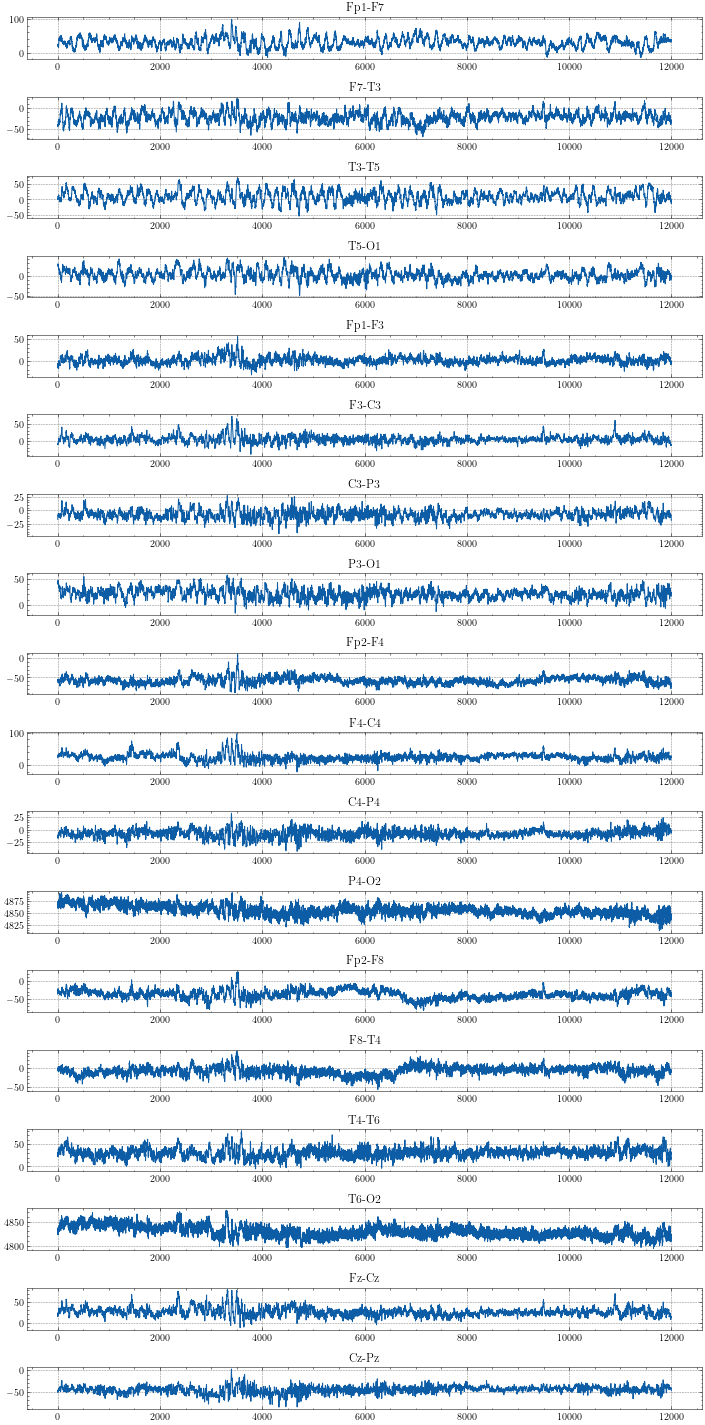

In [45]:
# plot all diff columns in a single plot of 1 column and len(diff_cols) rows
fig, axes = plt.subplots(len(diff_cols), 1, figsize=(10, 20))
for i, col in enumerate(diff_cols):
    axes[i].plot(eeg[col])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

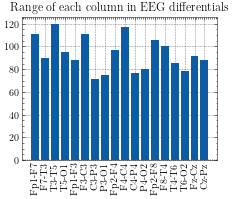

In [46]:
# make a bar plot the range of each column in diff_cols
ranges = [eeg[col].max() - eeg[col].min() for col in diff_cols]
plt.bar(diff_cols, ranges)
plt.xticks(rotation=90)
plt.title('Range of each column in EEG differentials')
plt.show()

